# <center> 【Kaggle】Telco Customer Churn      电信用户流失预测案例

## <font face="仿宋">前言：案例学习说明与案例建模流程

&emsp;&emsp;<font face="仿宋">在学习了经典机器学习算法和Scikit-Learn的调参策略之后，接下来，我们将把此前所学到的内容应用到实践当中去。从本节开始，我们将围绕Kaggle中的电信用户流失数据集（Telco Customer Churn）进行用户流失预测。在此过程中，我们将综合应用此前所介绍的各种方法与技巧，并在实践中提炼总结更多实用技巧。        

&emsp;&emsp;<font face="仿宋">对于实战案例的讲解，我们将分为三个阶段进行，当然这也是我们在参与算法竞赛、或者在实际算法建模时的一般流程：        
- <font face="仿宋">**Stage 1.业务背景解读与数据探索**      
    &emsp;&emsp;在拿到数据（接受任务）的第一时间，需要对数据（也就是对应业务）的基本背景进行解读。由于任何数据都诞生于某业务场景下，同时也是根据某些规则来进行的采集或者计算得出，因此如果可以，我们应当尽量去了解数据诞生的基本环境和对应的业务逻辑，尽可能准确的解读每个字段的含义，而只有在无法获取真实业务背景时，才会考虑退而求其次通过数据情况去倒推业务情况。        
    &emsp;&emsp;当然，在进行了数据业务背景解读后，接下来就需要对拿到的数据进行基本的数据探索。一般来说，数据探索包括数据分布检验、数据正确性校验、数据质量检验、训练集/测试集规律一致性检验等。当然，这里可能涉及到的操作较多，也并非所有的操作都必须在一次建模过程中全部完成。但作为教学案例，我们将在后续的内容中详细介绍每个环节的相关操作及目的。      
- <font face="仿宋">**Stage 2.数据预处理与特征工程**       
    &emsp;&emsp;在了解了建模业务背景和基本数据情况后，接下来我们就需要进行实际建模前的“数据准备”工作了，也就是数据预处理（数据清洗）与特征工程。其中，数据清洗主要聚焦于数据集数据质量提升，包括缺失值、异常值、重复值处理，以及数据字段类型调整等；而特征工程部分则更倾向于调整特征基本结构，来使数据集本身规律更容易被模型识别，如特征衍生、特殊类型字段处理（包括时序字段、文本字段等）等。        
    &emsp;&emsp;当然，很多时候我们并不刻意区分数据清洗与特征工程之间的区别，很多时候数据清洗的工作也可以看成是特征工程的一部分。同时，也有很多时候我们也不会一定要求在不同阶段执行不同操作，例如如果在数据探索时发现缺失值比例较小，则可以直接对其进行均值/众数填补，而不用等到特征工程阶段统一处理，再例如很多特征工程的方法需要结合实际建模效果来判别，所以有的时候特征衍生也会和建模过程交替进行。     
- <font face="仿宋">**Stage 3.算法建模与模型调优**        
    &emsp;&emsp;在经过一系列准备工作后，就将进入到最终建模环节了，建模过程既包括算法训练也包括参数调优。当然，很多时候建模工作不会一蹴而就，需要反复尝试各种模型、各种调参方法、以及模型融合方法。此外，很多时候我们也需要根据最终模型输出结果来进行数据预处理和特征工程相关方法调整。

&emsp;&emsp;<font face="仿宋">上述流程可以用如下流程图进行表示：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvx863plxej31d50u0whq.jpg" alt="2" style="zoom:90%;" />

&emsp;&emsp;<font face="仿宋">本节我们将先从数据集业务背景开始介绍，并简单讨论如何借助Kaggle平台获取更多帮助。同时我们也将围绕获取到的数据进行数据探索。

# <center> Part 1.数据背景介绍与数据探索

## 一、业务背景与数据背景

### 1.数据集基本情况与数据集获取方法

&emsp;&emsp;本次案例的数据源自Kaggle平台上分享的建模数据集：[Telco Customer Churn](https://www.kaggle.com/blastchar/telco-customer-churn)，该数据集描述了某电信公司的用户基本情况，包括每位用户已注册的相关服务、用户账户信息、用户人口统计信息等，当然，也包括了最为核心的、也是后续建模需要预测的标签字段——用户流失情况（Churn）。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvw8gsn2lfj30vv05f3z2.jpg" alt="74" style="zoom:70%;" />

&emsp;&emsp;需要注意的是，该数据并非竞赛数据集，而是Kaggle分享的一个高投票数据集（1788 votes），是Kaggle平台上非常经典的围绕偏态数据集建模的数据集。该数据源自IBM商业社区（[IBM Business Analytics Community](https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113)）上分享的数据集，用于社区成员内部学习使用。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvxepj3bfej31ya0i6wha.jpg" alt="74" style="zoom:70%;" />

&emsp;&emsp;根据IBM商业社区分享团队描述，该数据集为某电信公司在加利福尼亚为7000余位用户（个人/家庭）提供电话和互联网服务的相关记录。由于该数据集并不是竞赛数据集，因此数据集的下载方式相对容易，官网也只提供了网页下载一种选项（无法通过命令行直接下载）。我们可以在[该数据集的Kaggle主页](https://www.kaggle.com/blastchar/telco-customer-churn)看到数据集的相关信息以及下载地址。此处我们简单介绍关于Kaggle数据集页面的基本功能，既Kaggle平台的基本使用方法，在后续的课程学习中，若是Kaggle案例，我们也将频繁借助Kaggle主页来获取帮助。当然，熟练使用Kaggle主页获取数据和挖掘信息（而不是借助第三方渠道），也是算法工程师必备技能之一。

- 数据集主页

&emsp;&emsp;首先是数据集主页：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvxf90uh6bj314j0u0wja.jpg" alt="74" style="zoom:50%;" />

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvxfbcfhgaj31gy0twafr.jpg" alt="74" style="zoom:40%;" />

&emsp;&emsp;此处我们能大致看到数据集基本信息，如总共只有一个数据文件（在其他很多情况下，一个建模目标可能会包含多个数据集），总共21列，7043条数据，以及其他各列的一些基本统计信息等。

&emsp;&emsp;当然，在数据集主页上，我们可以直接点击下载按钮进行数据集下载。下载完成后将其放到当前操作主目录下进行读取：

In [3]:
import numpy as np
import pandas as pd

In [4]:
tcc = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
pd.set_option('max_colwidth',200)

tcc.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


> 在其他一些情况下，我们可能需要借助命令行来进行数据集下载和建模结果提交，相关内容我们将在后续介绍竞赛数据集时详细讨论。

- Discussion页面

&emsp;&emsp;此外，我们还能够在Discussion页面中看到围绕该建模问题的相关讨论。值得一提的是，在很多场合下（尤其是在参加算法竞赛时），Discussion页面中的讨论帖都是重要的信息获取渠道，其中不乏一些官方给出的补充问答内容、一些竞赛大神给出的自己的赛题理解、以及一些参赛者独到的讨论和见解。而从中快速捕获信息，则能帮助你迅速建立信息优势。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvxfvjbnhmj31bw0u042g.jpg" alt="74" style="zoom:40%;" />

&emsp;&emsp;例如在本数据集相关的讨论中，就有关于用户流失业务背景的相关讨论。其内较为具体的说明了到底什么是用户流失、为什么要关注用户流失，以及围绕用户流失在进行建模时，最好关注那些模型评估指标。当然，这些内容我们也将随后详细探讨。

- Code页面

&emsp;&emsp;此外，我们还能够在code页面看到其他用户分享的代码，其中也不乏一些精彩的思路和方法，也有很多可以借鉴和学习的内容。比如在该数据集的Code页面，就有很多同学会比较关注的处理样本不均衡的SHAP方法，以及该方法配合集成学习的使用方法：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvxg2m9ur1j31gw0tygpz.jpg" alt="74" style="zoom:40%;" />

> 当然，Kaggle平台上也有很多带有广告性质的内容，需要进行甄别。

### 2.用户流失业务背景与建模目标

- 电信业务基本背景介绍

&emsp;&emsp;在基本了解Kaggle平台使用方法以及获取到建模数据集之后，接下来我们需要围绕电信用户流失这一基本业务背景来进行介绍，同时解释本案例的最终建模目标。

&emsp;&emsp;我们知道，电信作为公共网络、数据传输、电话语音通信等基础服务提供方，一直以来都是国家支柱产业之一。而伴随着移动互联网的普及、数字经济蓬勃发展，网络这一基础设施也愈发重要。有个非常形象的比喻，在过去，断电会导致工厂停产、造成重大的经济损失，而现在，中断网络数字传输，则足以让某些企业一夜损失上亿。

&emsp;&emsp;简而言之，在一定程度上，网络的质量和速度甚至会直接决定着数字经济发展的质量和速度。而伴随着5G时代的到来，5G的工业化应用，如车联网、物联网、工业互联网等，也将在未来发展成为万亿规模产业，并且增强宽带、海量连接、低延时、高可靠的网络基础设施，将为构建物联网、人工智能等技术体系提供保障。

&emsp;&emsp;而在此背景下，电信市场的竞争也愈发激烈。一般来说电信领域的运营商在3-4家时能保持一个健康的市场竞争状态，而在国内，5G的运营商牌照也颁发了四家，除了三大运营商外（电信、联通、移动），还有中国广电。而在数字时代，传统的大众营销已经失去优势，如何基于用户信息和行为，来进行更加精准的营销，从而满足用户更加多样化、层次化和个性化的需求，成为所有电信运营商必须面对的课题。而于此同时，电信的公共客户（个人或家庭用户）用户又同时具有易变性、发展性和替代性等特点，且用户需求弹性较小，外加普通用户购买电信产品周期较长，导致在实际的交易关系中，电信公司对公共客户获客较难、主动拓展新用户成本较高，因此维系既有用户、防止用户流失就成了重要的运营策略。

&emsp;&emsp;当然，对于电信运营商来说，用户流失有很多偶然因素，不过通过对用户属性和行为的数字化描述，我们或许也能够在这些数据中，挖掘导致用户流失的“蛛丝马迹”，并且更重要的一点，如果能够实时接入这些数据，或许还能够进一步借助模型来对未来用户流失的风险进行预测，从而及时制定挽留策略，来防止用户真实流失情况发生。

- 机器学习建模目标

&emsp;&emsp;也就是说，在此背景下，实际的算法建模目标有两个，其一是对流失用户进行预测，其二则是找出影响用户流失的重要因子，来辅助运营人员来进行营销策略调整或制定用户挽留措施。

&emsp;&emsp;综合上述两个目标我们不难发现，我们要求模型不仅要拥有一定的预测能力，并且能够输出相应的特征重要性排名，并且最好能够具备一定的可解释性，也就是能够较为明显的阐述特征变化是如何影响标签取值变化的。据此要求，我们首先可以考虑逻辑回归模型。逻辑回归的线性方程能够提供非常好的结果可解释性，同时我们也可以通过逻辑回归中的正则化项也可以用于评估特征重要性。

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gs3v9h2gysj31gi0sy7bh.jpg" alt="1" style="zoom:33%;" />

&emsp;&emsp;当然，此外我们也可以考虑构建决策树即集成模型来解决该问题。决策树同样具有较好的可解释性，并且也可以根据树模型中的信息熵（或者基尼系数）的下降情况来进行特征重要性评估。

## 二、数据解读与预处理

&emsp;&emsp;在基本了解业务背景和建模目标之后，我们开始围绕数据集进行解读和探索。

### 1.字段解释

&emsp;&emsp;首先是围绕数据集字段含义进行解释。该数据集并没有提供相应的数据字典作为不同字段的解释，但由于数据集并没有匿名字段，所以基本可以根据字段的名称给出相应的解释：

In [7]:
tcc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


根据Kaggle的数据集介绍，以及IBM商业分析社区中提供的解释，数据集中各字段解释如下：

| 字段 | 解释 |
| ------ | ------ |
| customerID | 用户ID |
| gender | 性别 |
| SeniorCitizen | 是否是老年人（1代表是） |
| Partner | 是否有配偶（Yes or No） |
| Dependents | 是否经济独立（Yes or No） |
| tenure | 用户入网时间 |
| PhoneService | 是否开通电话业务（Yes or No） |
| MultipleLines | 是否开通多条电话业务（Yes 、 No or No phoneservice） |
| InternetService | 是否开通互联网服务（No、DSL数字网络或filber potic光线网络） |
| OnlineSecurity | 是否开通网络安全服务（Yes、No or No internetservice） |
| OnlineBackup | 是否开通在线备份服务（Yes、No or No internetservice） |
| DeviceProtection | 是否开通设备保护服务（Yes、No or No internetservice） |
| TechSupport | 是否开通技术支持业务（Yes、No or No internetservice）  |
| StreamingTV  | 是否开通网络电视（Yes、No or No internetservice） |
| StreamingMovies | 是否开通网络电影（Yes、No or No internetservice）  |
| Contract | 合同签订方式（按月、按年或者两年）  |
| PaperlessBilling | 是否开通电子账单（Yes or No）  |
| PaymentMethod | 付款方式（bank transfer、credit card、electronic check、mailed check） |
| MonthlyCharges | 月度费用 |
| TotalCharges | 总费用  |
| Churn | 是否流失（Yes or No） |

同时，根据官方给出的数据集说明，上述字段基本可以分为三类，分别是用户已注册的服务信息、用户账户信息和用户人口统计信息，三类字段划分情况如下：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvyrhwvl01j30x40u0769.jpg" alt="1" style="zoom:70%;" />

### 2.数据质量探索

&emsp;&emsp;在了解数据集字段含义后，首先我们需要对数据集的数据质量进行探索，这也是数据探索的最基础的角度。

- 数据集正确性校验

&emsp;&emsp;首先是数据集正确性校验。一般来说数据集正确性校验分为两种，其一是检验数据集字段是否和数据字典中的字段一致，其二则是检验数据集中ID列有无重复。由于该数据集并为提供数据字典，因此此处主要校验数据集ID有无重复：

In [8]:
tcc['customerID'].nunique() == tcc.shape[0]

True

当然，ID列没有重复，则数据集中也不存在完全重复的两行数据：

In [10]:
tcc.duplicated().sum()

0

- 数据缺失值检验

&emsp;&emsp;接下来进一步检查数据集缺失情况，我们可以通过isnull来快速查看数据集缺失情况：

In [11]:
tcc.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

此外，我们也可以通过定义如下函数来输出更加完整的每一列缺失值的数值和占比：

In [12]:
def missing (df):
    """
    计算每一列的缺失值及占比
    """
    missing_number = df.isnull().sum().sort_values(ascending=False)              # 每一列的缺失值求和后降序排序                  
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)          # 每一列缺失值占比
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])      # 合并为一个DataFrame
    return missing_values

In [13]:
missing(tcc)

,Missing_Number,Missing_Percent
customerID,0,0.0
DeviceProtection,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


> 此外，在info返回的信息中的non-null也能看出数据集不存在缺失值。

从上述结果能看出，数据集不存在缺失值。

> 没有缺失只代表数据集中没有None或者Nan，并不排除可能存在用别的值表示缺失值的情况，稍后我们将对其进行进一步分析。

### 2.字段类型探索

&emsp;&emsp;接下来，我们将进一步围绕数据集的字段类型来进行调整。

- 时序字段处理

&emsp;&emsp;根据数据集info我们发现，大多数字段都属于离散型字段，并且object类型居多。对于建模分析来说，我们是无法直接使用object类型对象的，因此需要对其进行类型转化，通常来说，我们会将字段划分为连续型字段和离散型字段，并且根据离散字段的具体含义来进一步区分是名义型变量还是有序变量。不过在划分连续/离散字段之前，我们发现数据集中存在一个入网时间字段，看起来像是时序字段。需要注意的是，从严格意义上来说，用时间标注的时序字段即不数据连续型字段或离散型字段（尽管可以将其看成是离散字段，但这样做会损失一些信息），因此我们需要重点关注入网时间字段是否是时间标注的字段：

In [14]:
tcc['tenure']

0        1
1       34
2        2
3       45
4        2
        ..
7038    24
7039    72
7040    11
7041     4
7042    66
Name: tenure, Length: 7043, dtype: int64

简单查看我们发现，该字段并不是典型的用年月日标注的时间字段，如2020-08-01，而是一串连续的数值。当然，我们可以进一步查看该字段的取值范围：

In [15]:
tcc['tenure'].nunique()

73

该字段总共有73个不同的取值，结合此前所说，数据集是第三季度的用户数据，因此我们推断该字段应该是经过字典排序后的离散型字段。所谓字典排序，其本质是一种离散变量的转化方式，有时我们也可以将时序数据进行字典排序，该过程我们可以通过如下示例进行说明：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvyd6vzknkj315w0nqtbk.jpg" alt="1" style="zoom:33%;" />

也就是说，在第三季度中，这些用户的行为发生在某73天内，因此入网时间字段有73个取值。不过由于该字段是经过字典排序后的结果，因此已经损失了原始信息，即每位用户实际的入网时间。而在实际的分析过程中，我们可以转化后的入网时间字段看成是离散变量，当然也可以将其视作连续变量来进行分析，具体选择需要依据模型来决定。此处我们先将其视作离散变量，后续根据情况来进行调整。

> 关于字典排序的代码实现方法会在后续进行介绍。

- 连续/离散型变量标注

&emsp;&emsp;接下来，我们来标注每一列的数据类型，我们可以通过不同列表来存储不同类型字段的名称：

In [16]:
# 离散字段
category_cols = ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 
                'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
                'PaymentMethod']

# 连续字段
numeric_cols = ['MonthlyCharges', 'TotalCharges']

# 标签
target = 'Churn'

# 验证是否划分能完全
assert len(category_cols) + len(numeric_cols) + 1 == tcc.shape[1]

&emsp;&emsp;当然，大多数时候离散型字段都在读取时都是object类型，因此我们也可以通过如下方式直接提取object字段：

In [17]:
tcc.select_dtypes('object').columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

然后，我们需要对不同类型字段进行转化。并且在此过程中，我们需要检验是否存在采用别的值来表示缺失值的情况。就像此前所说我们通过isnull只能检验出None(Python原生对象)和np.Nan(numpy/pandas在读取数据文件时文件内部缺失对象的读取后表示形式)对象。但此外我们还需要注意数据集中是否包含采用某符号表示缺失值的情况，例如某些时候可能使用空格（其本质也是一种字符）来代替空格：

In [ ]:
df = pd.DataFrame({'A':['Y', None, 'N', 'N'], 'B':[np.NaN, ' ', 'Y', 'N']})

In [ ]:
df

,A,B
0,Y,NaN
1,None,
2,N,Y
3,N,N


此时在进行检验时，空格的数据并不会被识别为缺失值（空格本身也是一种值）。

In [ ]:
df.isnull()

,A,B
0,False,True
1,True,False
2,False,False
3,False,False


但根据实际情况来看，空格可能确实是代表着数据采集时数据是缺失的，因此我们仍然需要将其识别然后标记为缺失值，此时可以通过比较数据集各列的取值水平是否和既定的一致来进行检查。例如，对于上述df数据集来说，特征A和B默认情况只有Y和N两种取值，而B列由于通过空格表示了缺失值，因此用nunique查看数据集的话，B列将出现3种取值：

In [ ]:
df.nunique()

A    2
B    3
dtype: int64

> 注意，缺失值None或NaN并不是某一种取值

此时我们可以进一步查看B列每个不同取值出现的次数：

In [ ]:
df['B'].explode().value_counts().to_dict()

{'Y': 1, 'N': 1, ' ': 1}

在判断空格为缺失值后，我们即可对其进行后续处理。我们可以先检验离散变量是否存在这种情况：

In [ ]:
tcc[category_cols].nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
dtype: int64

我们也可以通过如下方式查看每个离散变量的不同取值：

In [ ]:
for feature in tcc[category_cols]:
        print(f'{feature}: {tcc[feature].unique()}')

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)

通过对比离散变量的取值水平，我们发现并不存在通过其他值表示缺失值的情况。

需要注意的是，如果是连续变量，则无法使用上述方法进行检验（取值水平较多），但由于往往我们需要将其转化为数值型变量再进行分析，因此对于连续变量是否存在其他值表示缺失值的情况，我们也可以观察转化情况来判别，例如如果是用空格代表缺失值，则无法直接使用astype来转化成数值类型。

In [ ]:
# 无法全部转化为数值型字段，运行将报错
# tcc[numeric_cols].astype(float)

- 缺失值检验与填补

发现在连续特征中存在空格。则此时我们需要进一步检查空格字符出现在哪一列的哪个位置，我们可以通过如下函数来进行检验：

In [18]:
def find_index(data_col, val):
    """
    查询某值在某列中第一次出现位置的索引，没有则返回-1
    
    :param data_col: 查询的列
    :param val: 具体取值
    """
    val_list = [val]
    if data_col.isin(val_list).sum() == 0:
        index = -1
    else:
        index = data_col.isin(val_list).idxmax()
    return index

查看空格第一次出现在哪一列的哪个位置：

In [19]:
for col in numeric_cols:
    print(find_index(tcc[col], ' '))

-1
488


即空格第一次出现在'TotalCharges'列的索引值为488的位置：

In [20]:
tcc['TotalCharges'].iloc[488]

' '

接下来使用np.nan对空格进行替换，并将'MonthlyCharges'转化为浮点数类型：

In [21]:
tcc['TotalCharges']= tcc['TotalCharges'].apply(lambda x: x if x!= ' ' else np.nan).astype(float)
tcc['MonthlyCharges'] = tcc['MonthlyCharges'].astype(float)

再次查看连续变量的缺失值占比情况：

In [22]:
missing(tcc[numeric_cols])

,Missing_Number,Missing_Percent
TotalCharges,11,0.001562
MonthlyCharges,0,0.000000


关于该缺失值应该如何填补，首先考虑的是，由于缺失值占比较小，因此可以直接使用均值进行填充：

In [23]:
tcc['TotalCharges'].fillna(tcc['TotalCharges'].mean())

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

此外，我们也可以简单观察缺失'TotalCharges'信息的每条数据实际情况，或许能发现一些蛛丝马迹：

In [24]:
tcc[tcc['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


我们发现，这11条数据的入网时间都是0，也就是说，这11位用户极有可能是在统计周期结束前的最后时间入网的用户，因此没有过去的总消费记录，但是却有当月的消费记录。也就是说，该数据集的过去总消费记录不包括当月消费记录，也就是不存在过去总消费记录等于0的记录。我们可以简单验证：

In [25]:
(tcc['TotalCharges'] == 0).sum()

0

既然如此，我们就可以将这11条记录的缺失值记录为0，以表示在最后一个月统计消费金额前，这些用户的过去总消费金额为0:

In [26]:
tcc['TotalCharges'] = tcc['TotalCharges'].fillna(0)

In [27]:
tcc['TotalCharges'].isnull().sum()

0

In [28]:
tcc['TotalCharges'].describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

此外还有另一种便捷的方式，即直接使用pd.to_numeric对连续变量进行转化，并在errors参数位上输入'coerce'参数，表示能直接转化为数值类型时直接转化，无法转化的用缺失值填补，过程如下：

In [29]:
df1 = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [30]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges, errors='coerce')

In [31]:
# 查看缺失值情况
df1.TotalCharges.isnull().sum()

11

In [32]:
# 查看原空格处是否被标记为缺失值
df1.TotalCharges.iloc[488]

nan

In [33]:
# 查看字段整体类型
df1.TotalCharges.dtype

dtype('float64')

> 注意，此处暂时未对离散特征进行变量类型转化，是因为本小节后半段需要围绕标签取值在不同特征维度上分布进行分析，此时需要查看各特征的原始取值情况（例如性别是Male和Female，而不是0/1），因此我们会在本节结束后对离散变量再进行字典编码。

- 异常值检验

&emsp;&emsp;当然，对于连续型变量，我们可以进一步对其进行异常值检测。首先我们可以采用describe方法整体查看连续变量基本统计结果：

In [34]:
tcc[numeric_cols].describe()

,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000
mean,64.761692,2279.734304
std,30.090047,2266.794470
min,18.250000,0.000000
25%,35.500000,398.550000
50%,70.350000,1394.550000
75%,89.850000,3786.600000
max,118.750000,8684.800000


异常值检测有很多方法，我们可以通过三倍标准差法来进行检验，即以均值-3倍标注差为下界，均值+3倍标准差为上界，来检测是否有超过边界的点：

In [35]:
tcc['MonthlyCharges'].mean() + 3 * tcc['MonthlyCharges'].std()

155.03183375363483

In [36]:
tcc['MonthlyCharges'].mean() - 3 * tcc['MonthlyCharges'].std()

-25.5084488324364

In [37]:
tcc['TotalCharges'].mean() + 3 * tcc['TotalCharges'].std()

9080.117712630885

In [38]:
tcc['TotalCharges'].mean() - 3 * tcc['TotalCharges'].std()

-4520.649105503233

能够发现，数据集并不存在异常值点。

&emsp;&emsp;此外，我们还可以通过箱线图来进行异常值点的识别，和3倍标准差法利用均值和方差进行计算不同，箱线图主要借助中位数和四分位数来进行计算，以上四分位数+1.5倍四分位距为上界、下四分位数-1.5倍四分位距为下界，超出界限则认为是异常值。我们可以借助plt.boxplot绘图函数迅速绘制箱线图来观察异常值点情况：

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
# MonthlyCharges上四分位数
Q3 = tcc[numeric_cols].describe()['MonthlyCharges']['75%']
Q3

89.85

In [41]:
# MonthlyCharges下四分位数
Q1 = tcc[numeric_cols].describe()['MonthlyCharges']['25%']
Q1

35.5

In [42]:
# # MonthlyCharges的四分位距
IQR = Q3 - Q1
IQR

54.349999999999994

In [43]:
# 异常值上界
Q3 + 1.5 * IQR

171.375

In [44]:
# 异常值下界
Q1 - 1.5 * IQR

-46.02499999999999

In [45]:
tcc['MonthlyCharges'].min(), tcc['MonthlyCharges'].max()

(18.25, 118.75)

In [46]:
Q3 = tcc[numeric_cols].describe()['TotalCharges']['75%']
Q1 = tcc[numeric_cols].describe()['TotalCharges']['25%']
IQR = Q3 - Q1
(Q1 - 1.5 * IQR, Q3 + 1.5 * IQR)

(-4683.525, 8868.675)

In [47]:
tcc['TotalCharges'].min(), tcc['TotalCharges'].max()

(0.0, 8684.8)

&emsp;&emsp;不过需要知道的是，由于数据集中没有超出边界的异常值点，因此在实际绘制箱线图时，箱线图的边界会以数据集的极值为准：

Text(0.5, 0, 'TotalCharges')

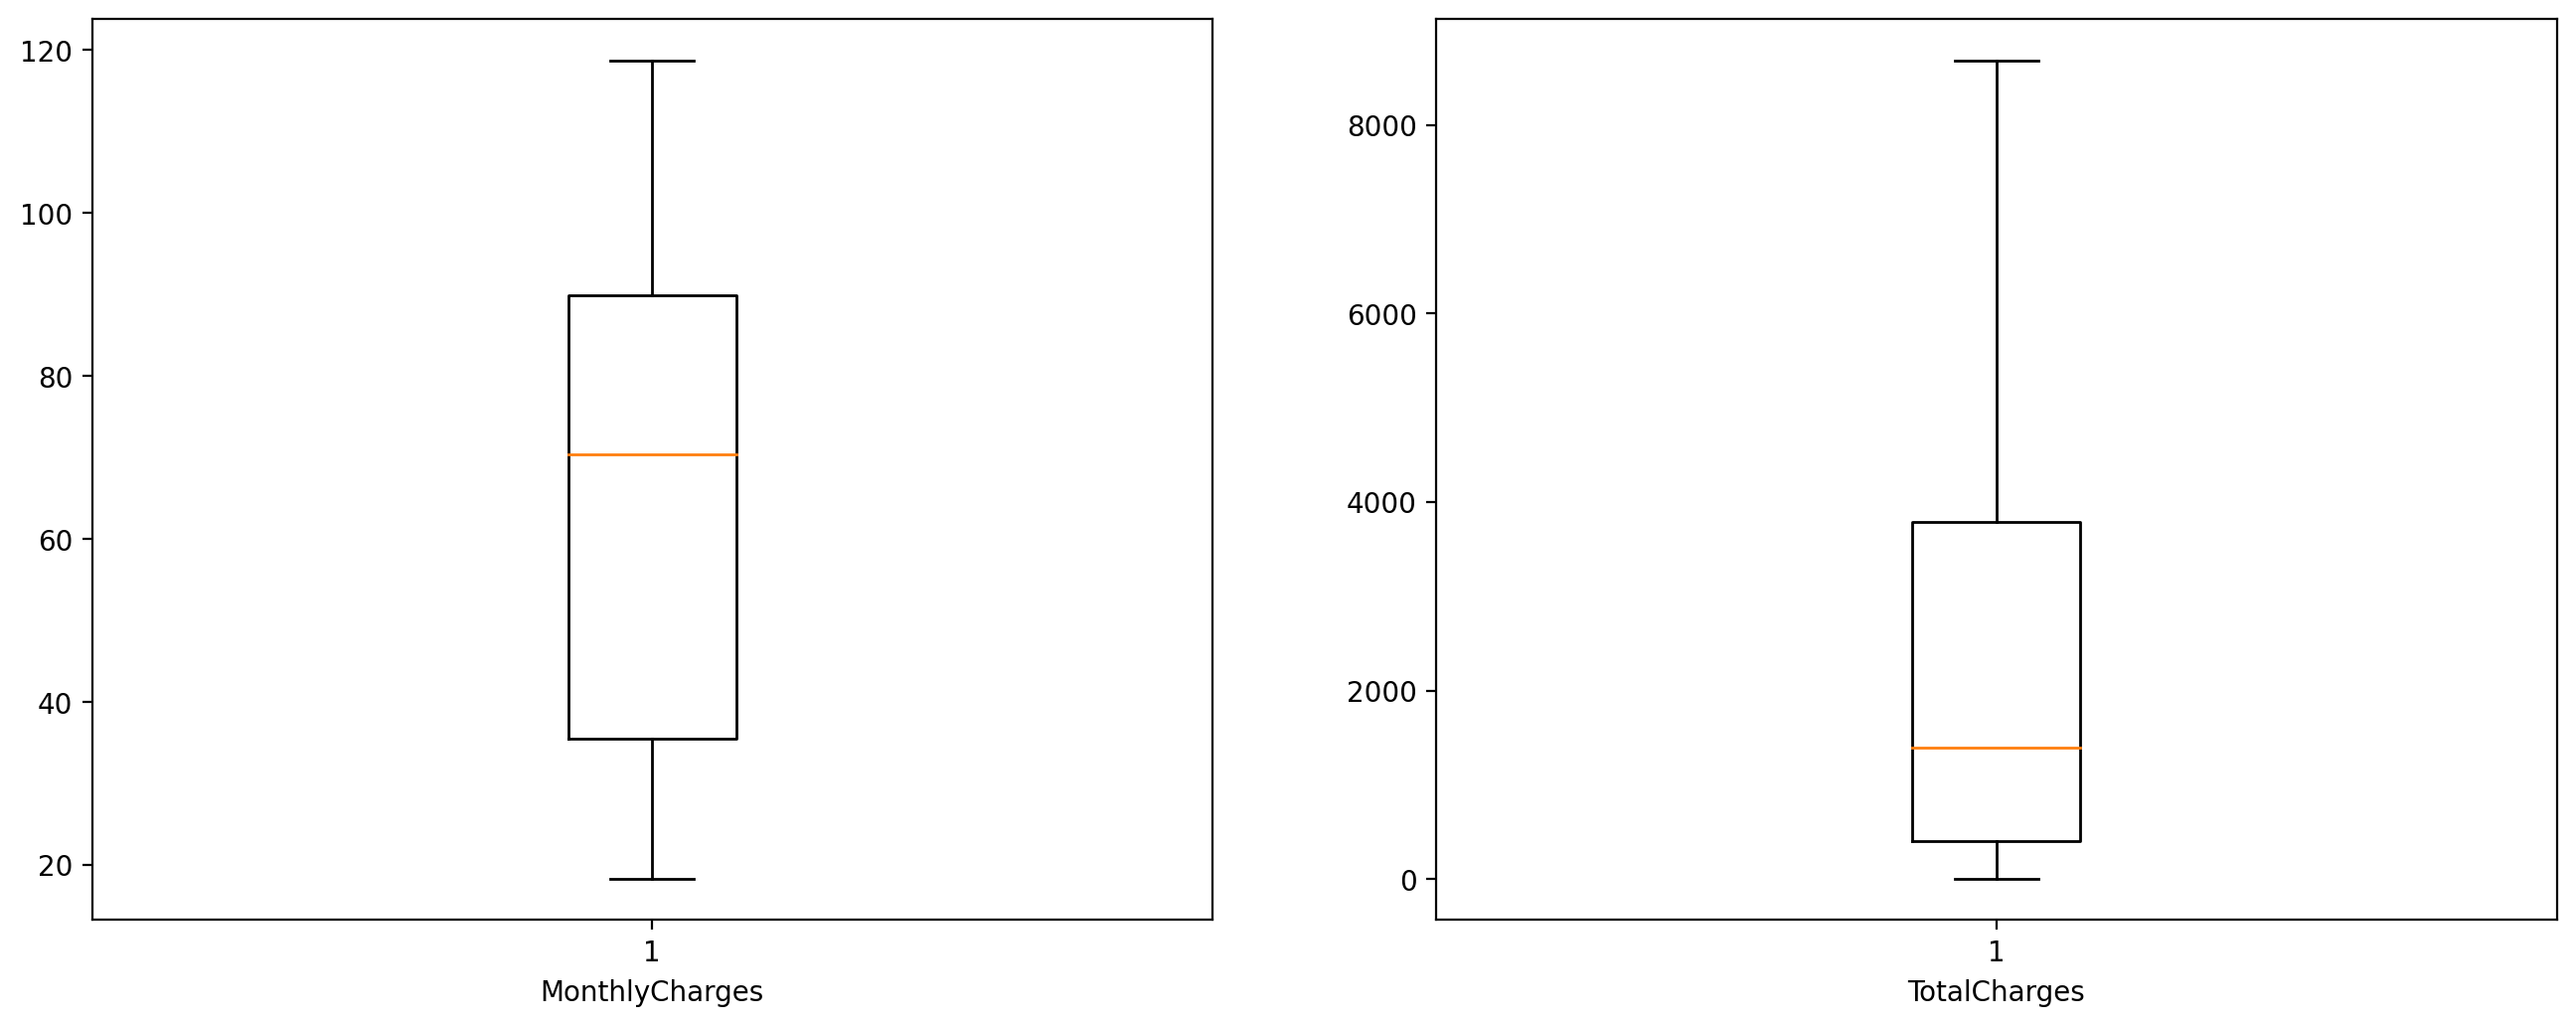

In [48]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
plt.boxplot(tcc['MonthlyCharges'])
plt.xlabel('MonthlyCharges')
plt.subplot(122)
plt.boxplot(tcc['TotalCharges'])
plt.xlabel('TotalCharges')

&emsp;&emsp;能够发现，根据箱线图的判别结果，数据并没有异常值出现。当然，此外我们还能通过连续变量的分布情况来观察是否存在异常值：

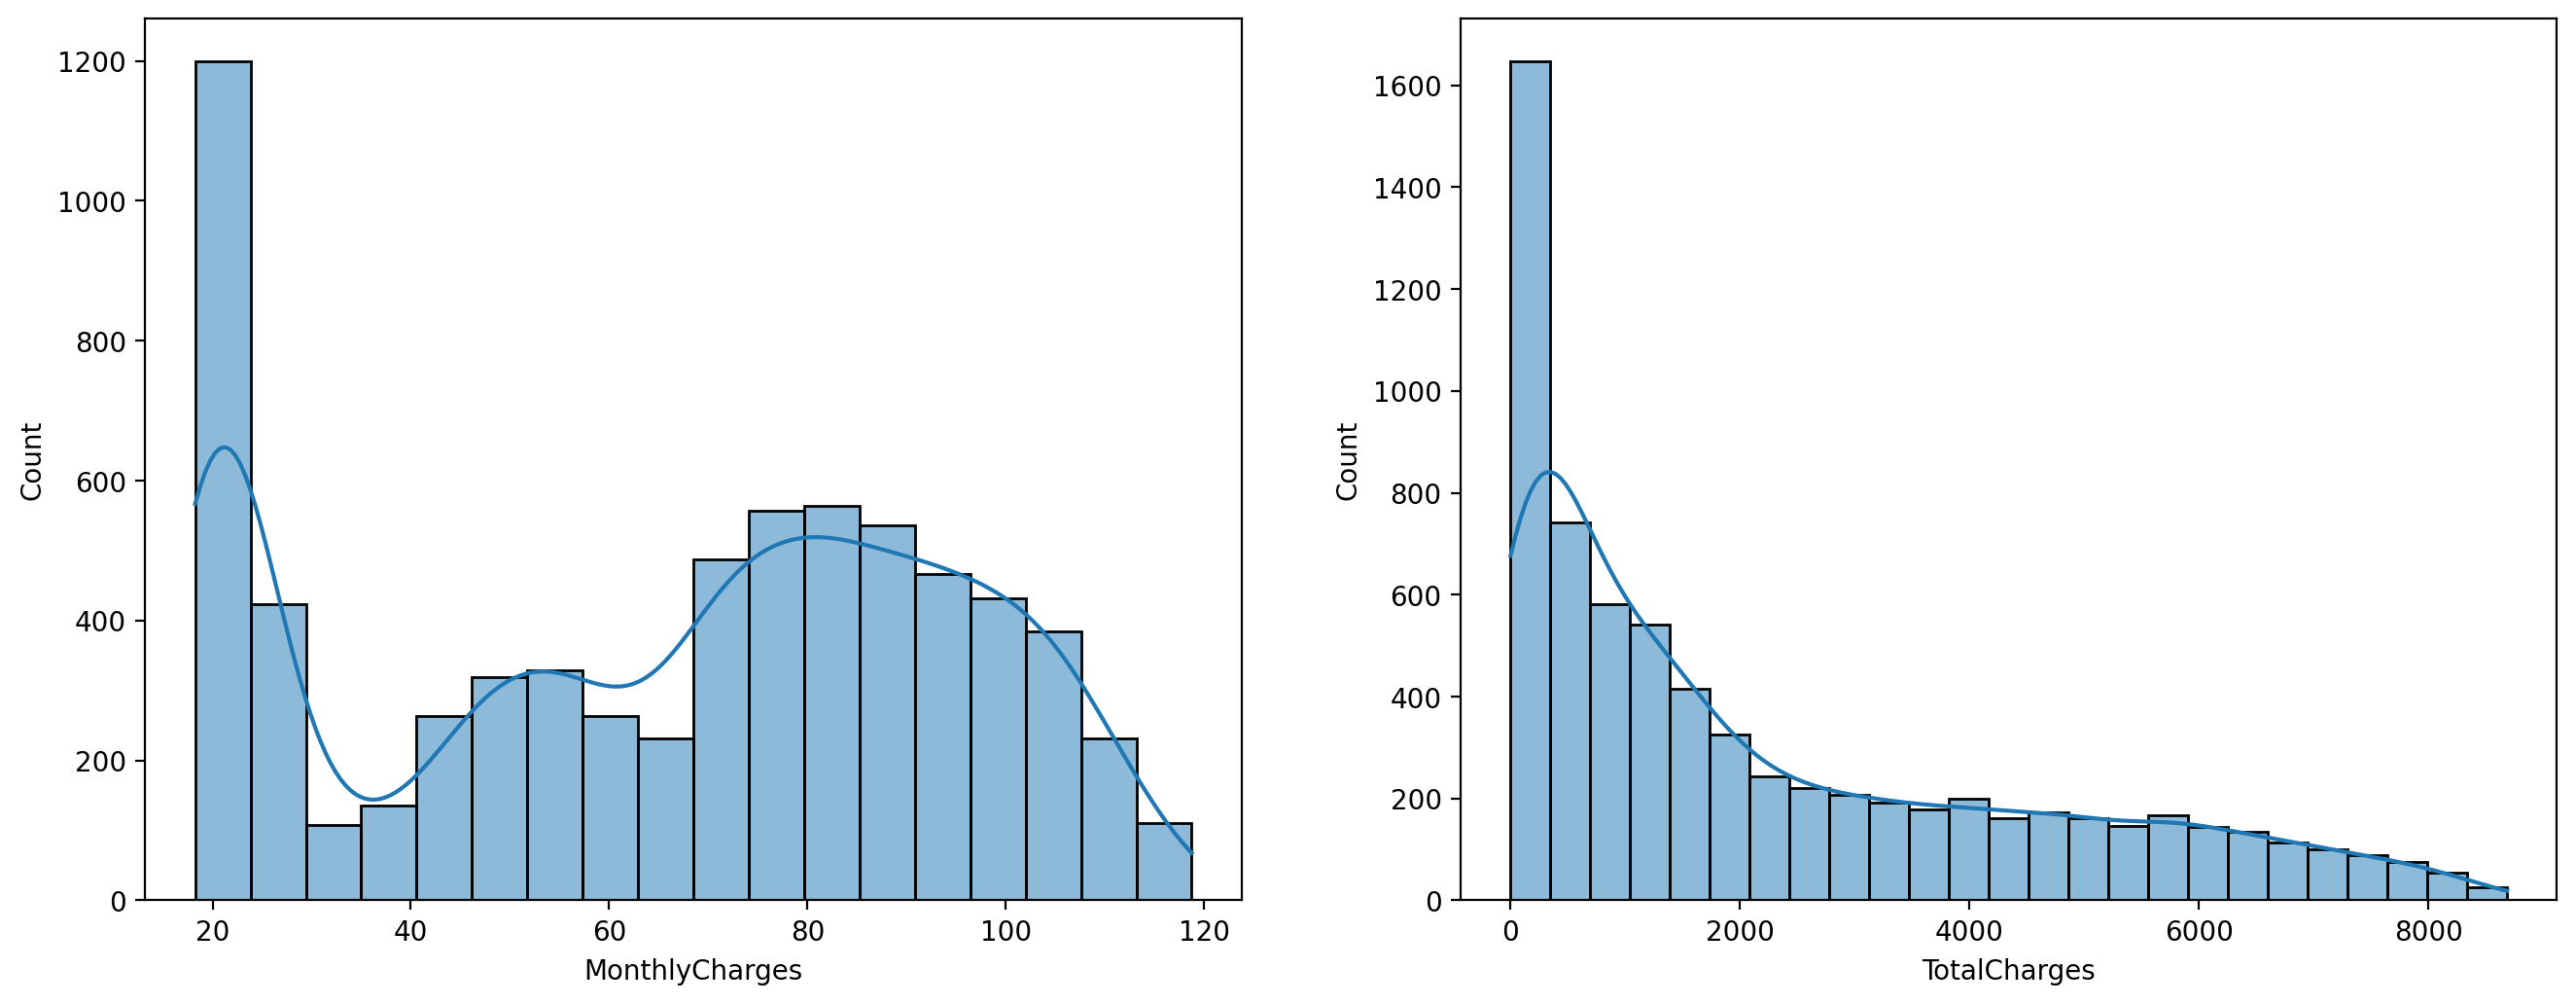

In [49]:
plt.figure(figsize=(16, 6), dpi=200)
plt.subplot(121)
sns.histplot(tcc['MonthlyCharges'], kde=True) 
plt.subplot(122)
sns.histplot(tcc['TotalCharges'], kde=True)

当然，通过上述图像我们也能基本看出月消费金额和总消费金额的基本分布情况，对于大多数用户来说月消费金额和总消费金额都较小，而月消费金额所出现的波动，极有可能是某些套餐的组合定价。

> 需要知道的是，对于异常值的检测和处理也是需要根据实际数据分布和业务情况来判定，一般来说，数据分布越倾向于正态分布，则通过三倍标准差或者箱线图检测的异常值会更加准确一些，此外，在很多时候，异常值或许是某类特殊用户的标识，有的时候我们需要围绕异常值进行单独分析，而不是简单的对其进行修改。

## 三、变量相关性探索分析与探索性分析

### 1.标签取值分布

&emsp;&emsp;在基本完成数据探索与处理之后，接下来我们可以通过探索标签在不同特征上的分布，来初步探索哪些特征对标签取值影响较大。当然，首先我们可以先查看标签字段的取值分布情况：

In [50]:
y = tcc['Churn']
print(f'Percentage of Churn:  {round(y.value_counts(normalize=True)[1]*100,2)} %  --> ({y.value_counts()[1]} customer)\nPercentage of customer did not churn: {round(y.value_counts(normalize=True)[0]*100,2)}  %  --> ({y.value_counts()[0]} customer)')

Percentage of Churn:  26.54 %  --> (1869 customer)
Percentage of customer did not churn: 73.46  %  --> (5174 customer)


也就是在总共7000余条数据中，流失用户占比约为26%，整体来看标签取值并不均匀，但如果放到用户流失这一实际业务背景中来探讨，流失用户比例占比26%已经是非常高的情况了。当然我们也可以通过直方图进行直观的观察：

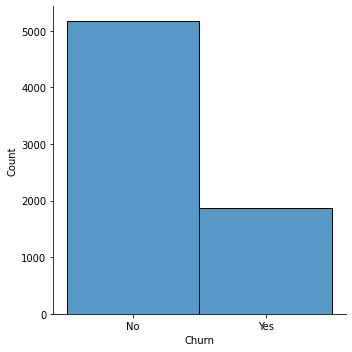

In [51]:
sns.displot(y)

### 2.变量相关性分析

&emsp;&emsp;接下来，我们尝试对变量和标签进行相关性分析。从严格的统计学意义讲，不同类型变量的相关性需要采用不同的分析方法，例如连续变量之间相关性可以使用皮尔逊相关系数进行计算，而连续变量和离散变量之间相关性则可以卡方检验进行分析，而离散变量之间则可以从信息增益角度入手进行分析。但是，如果我们只是想初步探查变量之间是否存在相关关系，则可以忽略变量连续/离散特性，统一使用相关系数进行计算，这也是pandas中的.corr方法所采用的策略。

- 计算相关系数矩阵

&emsp;&emsp;当然，首先我们可以先计算相关系数矩阵，直接通过具体数值大小来表示相关性强弱。不过需要注意的是，尽管我们可以忽略变量的连续/离散特性，但为了更好的分析分类变量如何影响标签的取值，我们需要将标签转化为整型（也就是视作连续变量），而将所有的分类变量进行哑变量处理：

In [52]:
# 剔除ID列
df3 = tcc.iloc[:,1:].copy()

# 将标签Yes/No转化为1/0
df3['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df3['Churn'].replace(to_replace='No',  value=0, inplace=True)

# 将其他所有分类变量转化为哑变量，连续变量保留不变
df_dummies = pd.get_dummies(df3)
df_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


此处需要注意pd.get_dummies会将非数值类型对象类型进行自动哑变量转化，而对数值类型对象，无论是整型还是浮点型，都会保留原始列不变：

In [53]:
df_dummies[['Churn', 'tenure', 'MonthlyCharges', 'TotalCharges']]

,Churn,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,1,2,53.85,108.15
3,0,45,42.30,1840.75
4,1,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


然后即可采用.corr方法计算相关系数矩阵：

In [54]:
df_dummies.corr()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
SeniorCitizen,1.000000,0.016567,0.220173,0.103006,0.150889,0.001874,-0.001874,-0.016479,0.016479,0.211185,...,0.120176,0.138360,-0.046262,-0.117000,-0.156530,0.156530,-0.016159,-0.024135,0.171718,-0.153477
tenure,0.016567,1.000000,0.247900,0.826178,-0.352229,-0.005106,0.005106,-0.379697,0.379697,-0.159712,...,0.286111,-0.645561,0.202570,0.558533,-0.006152,0.006152,0.243510,0.233006,-0.208363,-0.233852
MonthlyCharges,0.220173,0.247900,1.000000,0.651174,0.193356,0.014569,-0.014569,-0.096848,0.096848,0.113890,...,0.627429,0.060165,0.004904,-0.074681,-0.352150,0.352150,0.042812,0.030550,0.271625,-0.377437
TotalCharges,0.103006,0.826178,0.651174,1.000000,-0.198324,0.000080,-0.000080,-0.317504,0.317504,-0.062078,...,0.520122,-0.444255,0.170814,0.354481,-0.158574,0.158574,0.185987,0.182915,-0.059246,-0.295758
Churn,0.150889,-0.352229,0.193356,-0.198324,1.000000,0.008612,-0.008612,0.150448,-0.150448,0.164221,...,0.061382,0.405103,-0.177820,-0.302253,-0.191825,0.191825,-0.117937,-0.134302,0.301919,-0.091683
gender_Female,0.001874,-0.005106,0.014569,0.000080,0.008612,1.000000,-1.000000,-0.001808,0.001808,0.010517,...,0.010487,0.003386,-0.008026,0.003695,-0.011754,0.011754,0.016024,-0.001215,-0.000752,-0.013744
gender_Male,-0.001874,0.005106,-0.014569,-0.000080,-0.008612,-1.000000,1.000000,0.001808,-0.001808,-0.010517,...,-0.010487,-0.003386,0.008026,-0.003695,0.011754,-0.011754,-0.016024,0.001215,0.000752,0.013744
Partner_No,-0.016479,-0.379697,-0.096848,-0.317504,0.150448,-0.001808,0.001808,1.000000,-1.000000,0.452676,...,-0.117412,0.280865,-0.082783,-0.248091,-0.014877,0.014877,-0.110706,-0.082029,0.083852,0.095125
Partner_Yes,0.016479,0.379697,0.096848,0.317504,-0.150448,0.001808,-0.001808,-1.000000,1.000000,-0.452676,...,0.117412,-0.280865,0.082783,0.248091,0.014877,-0.014877,0.110706,0.082029,-0.083852,-0.095125
Dependents_No,0.211185,-0.159712,0.113890,-0.062078,0.164221,0.010517,-0.010517,0.452676,-0.452676,1.000000,...,0.039741,0.231720,-0.068368,-0.204613,-0.111377,0.111377,-0.052021,-0.060267,0.150642,-0.059071


当然，在所有的相关性中，我们较为关注特征和标签之间的相关关系，因此可以直接挑选标签列的相关系数计算结果，并进行降序排序：

In [55]:
df_dummies.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract_Month-to-month                    0.405103
OnlineSecurity_No                          0.342637
TechSupport_No                             0.337281
InternetService_Fiber optic                0.308020
PaymentMethod_Electronic check             0.301919
OnlineBackup_No                            0.268005
DeviceProtection_No                        0.252481
MonthlyCharges                             0.193356
PaperlessBilling_Yes                       0.191825
Dependents_No                              0.164221
SeniorCitizen                              0.150889
Partner_No                                 0.150448
StreamingMovies_No                         0.130845
StreamingTV_No                             0.128916
StreamingTV_Yes                            0.063228
StreamingMovies_Yes                        0.061382
MultipleLines_Yes                          0.040102
PhoneService_Yes                           0.011942
gender_Femal

需要知道的是，根据相关系数计算的基本原理，相关系数为正数，则二者为正相关，数值变化会更倾向于保持同步。例如Churn与Contract_Month-to-month相关系数为0.4，则说明二者存在一定的正相关性，即Contract_Month-to-month取值为1（更大）越有可能使得Churn取值为1。也就是在Contract字段的Month-to-month取值结果和最终流失的结果相关性较大，也就是相比其他条件，Contract取值为Month-to-month的用户流失概率较大，而tenure和Churn负相关，则说明tenure取值越大、用户流失概率越小。其他结果解读依此类推。

- 热力图展示相关性

&emsp;&emsp;当然，我们也可以通过一些可视化的方式来展示特征和标签之间的相关性，例如可以考虑使用热力图进行相关性的可视化展示：

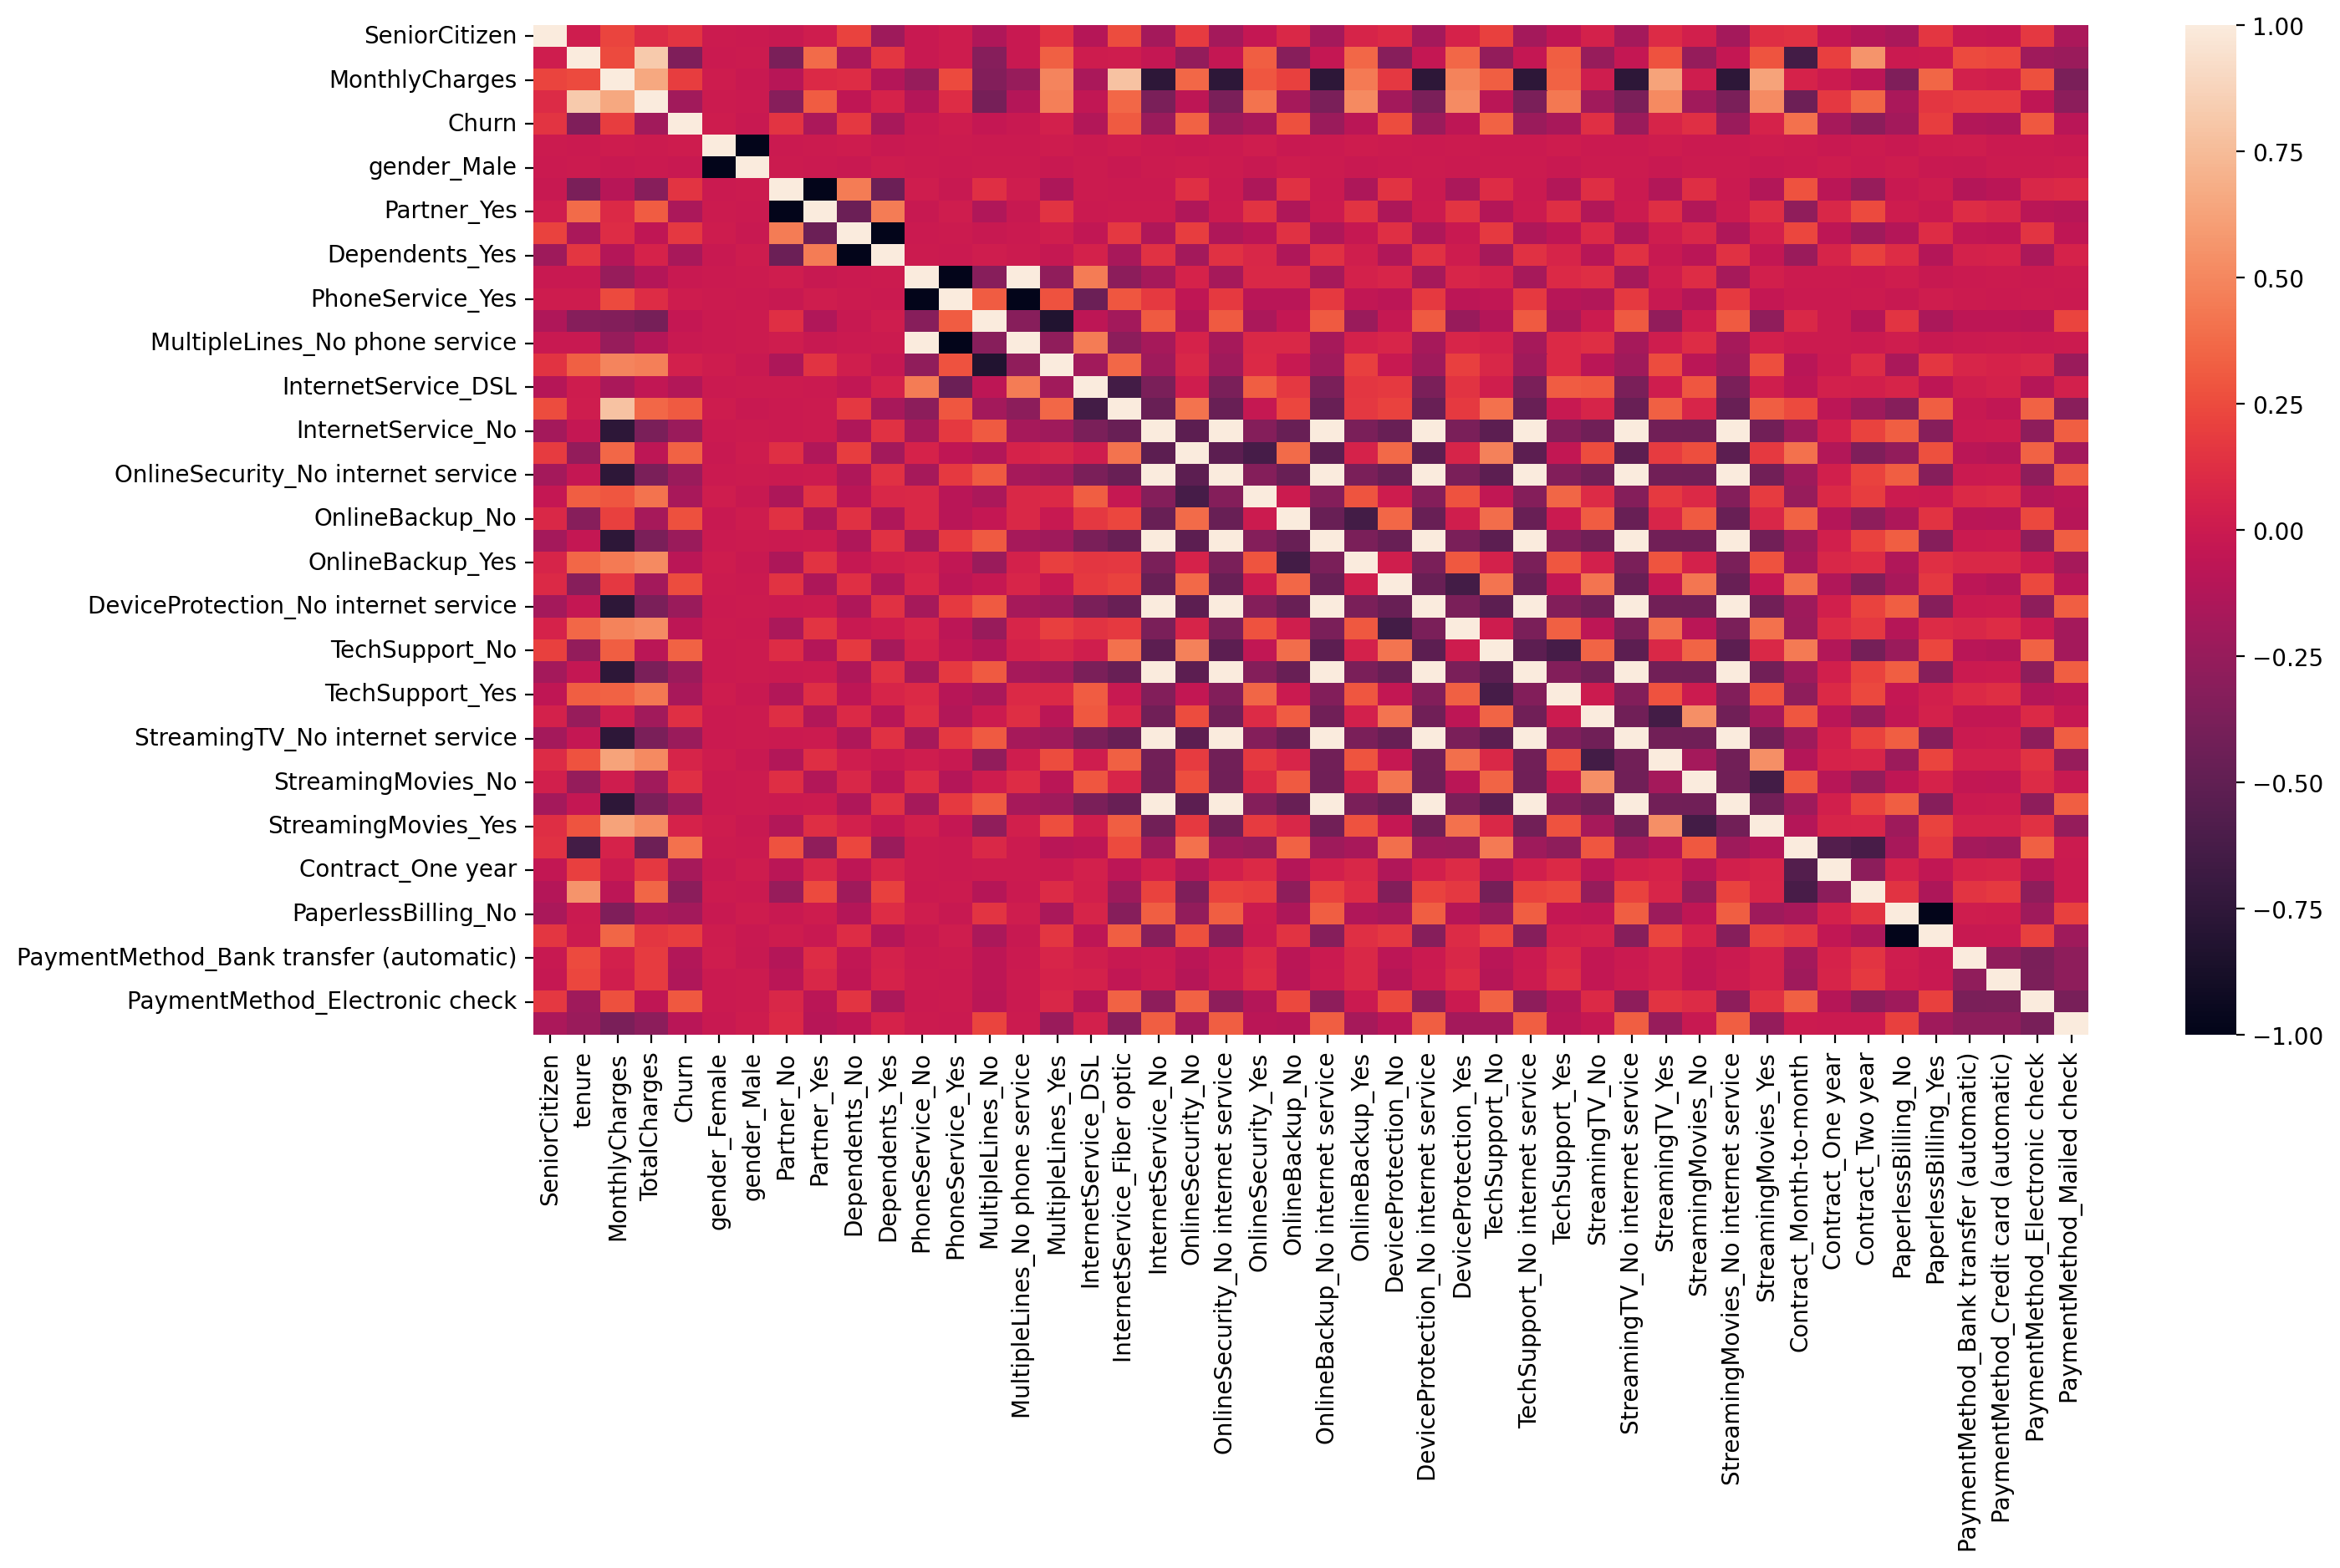

In [56]:
plt.figure(figsize=(15,8), dpi=200)
sns.heatmap (df_dummies.corr())

- 柱状图展示相关性

&emsp;&emsp;当然，很多时候如果特征较多，热力图的展示结果并不直观，此时我们可以考虑进一步使用柱状图来进行表示：

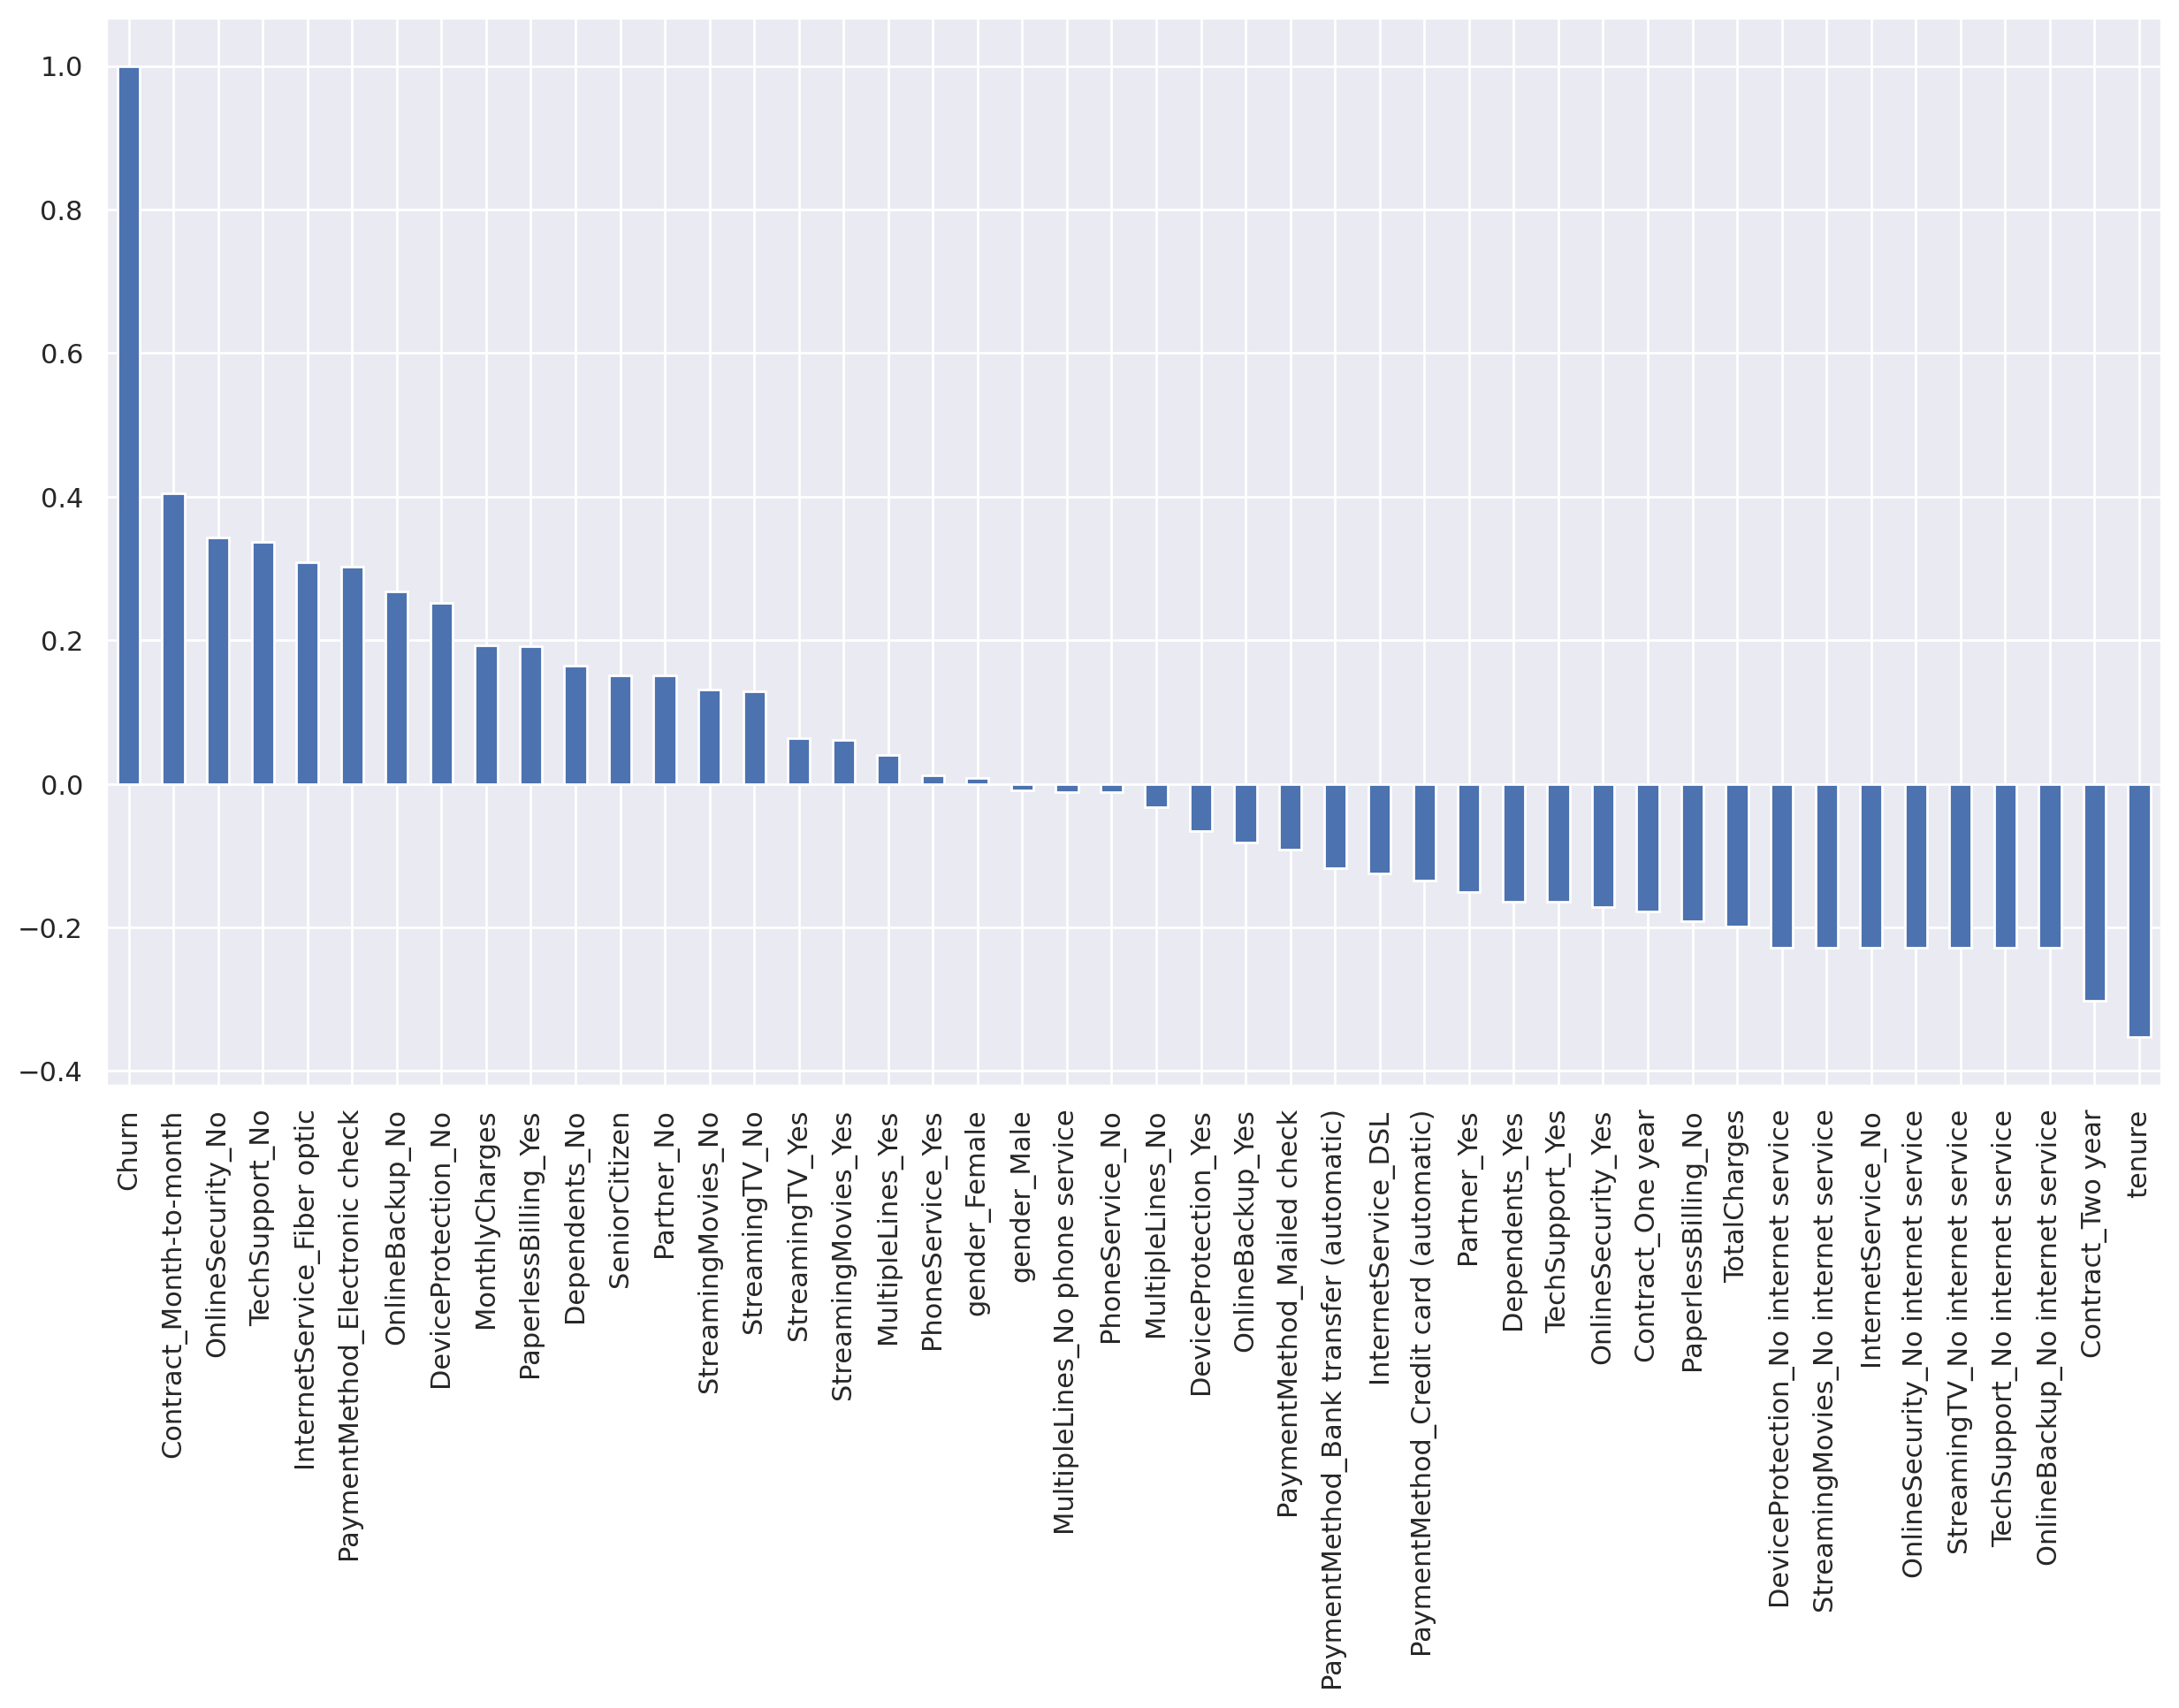

In [57]:
sns.set()
plt.figure(figsize=(15,8), dpi=200)

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

### 3.探索性数据分析

&emsp;&emsp;当然，直接计算整体相关系数矩阵以及对整体相关性进行可视化展示是一种非常高效便捷的方式，在实际的算法竞赛中，我们也往往会采用上述方法快速的完成数据相关性检验和探索工作。不过，如果是对于业务分析人员，可能我们需要为其展示更为直观和具体的一些结果，才能有效帮助业务人员对相关性进行判别。此时我们可以考虑围绕不同类型的属性进行柱状图的展示与分析。当然，此处需要对比不同字段不同取值下流失用户的占比情况，因此可以考虑使用柱状图的另一种变形：堆叠柱状图来进行可视化展示：

Text(0.5, 1.0, 'Churn by Gender')

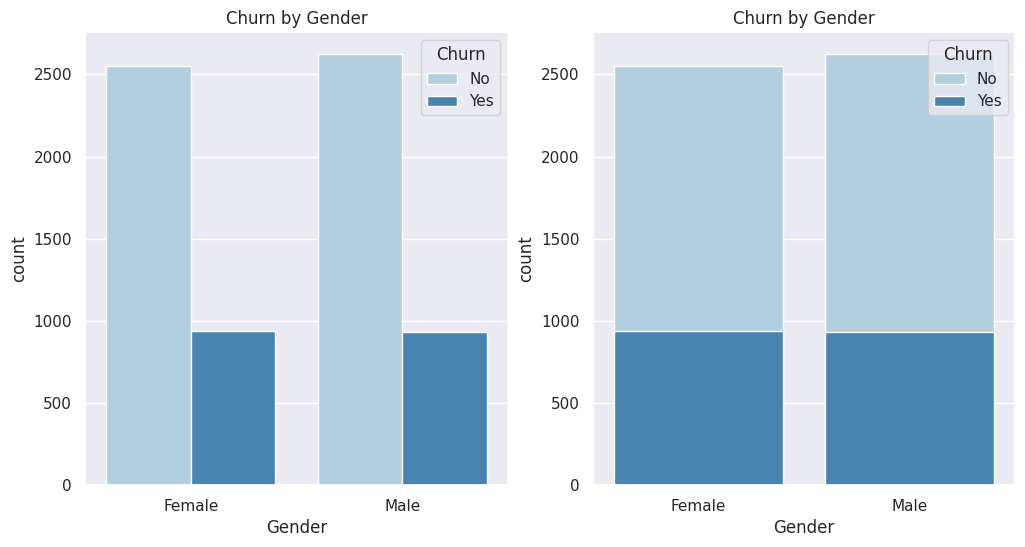

In [58]:
fig,axes=plt.subplots(nrows=1,ncols=2,figsize=(12,6), dpi=100)

# 柱状图
plt.subplot(121)
sns.countplot(x="gender",hue="Churn",data=tcc,palette="Blues", dodge=True)
plt.xlabel("Gender")
plt.title("Churn by Gender")

# 柱状堆叠图
plt.subplot(122)
sns.countplot(x="gender",hue="Churn",data=tcc,palette="Blues", dodge=False)
plt.xlabel("Gender")
plt.title("Churn by Gender")

> 注，此处堆叠图简单理解其实就是纯粹的重合，并不是上下堆叠，而是深色柱状图覆盖在浅色柱状图的上面。

接下来，我们将根据此前划分的字段类型来进行逐类分析：

<center><img src="https://tva1.sinaimg.cn/large/008i3skNly1gvyrhwvl01j30x40u0769.jpg" alt="1" style="zoom:70%;" />

- 用户人口统计信息

首先是用户的人口统计信息：

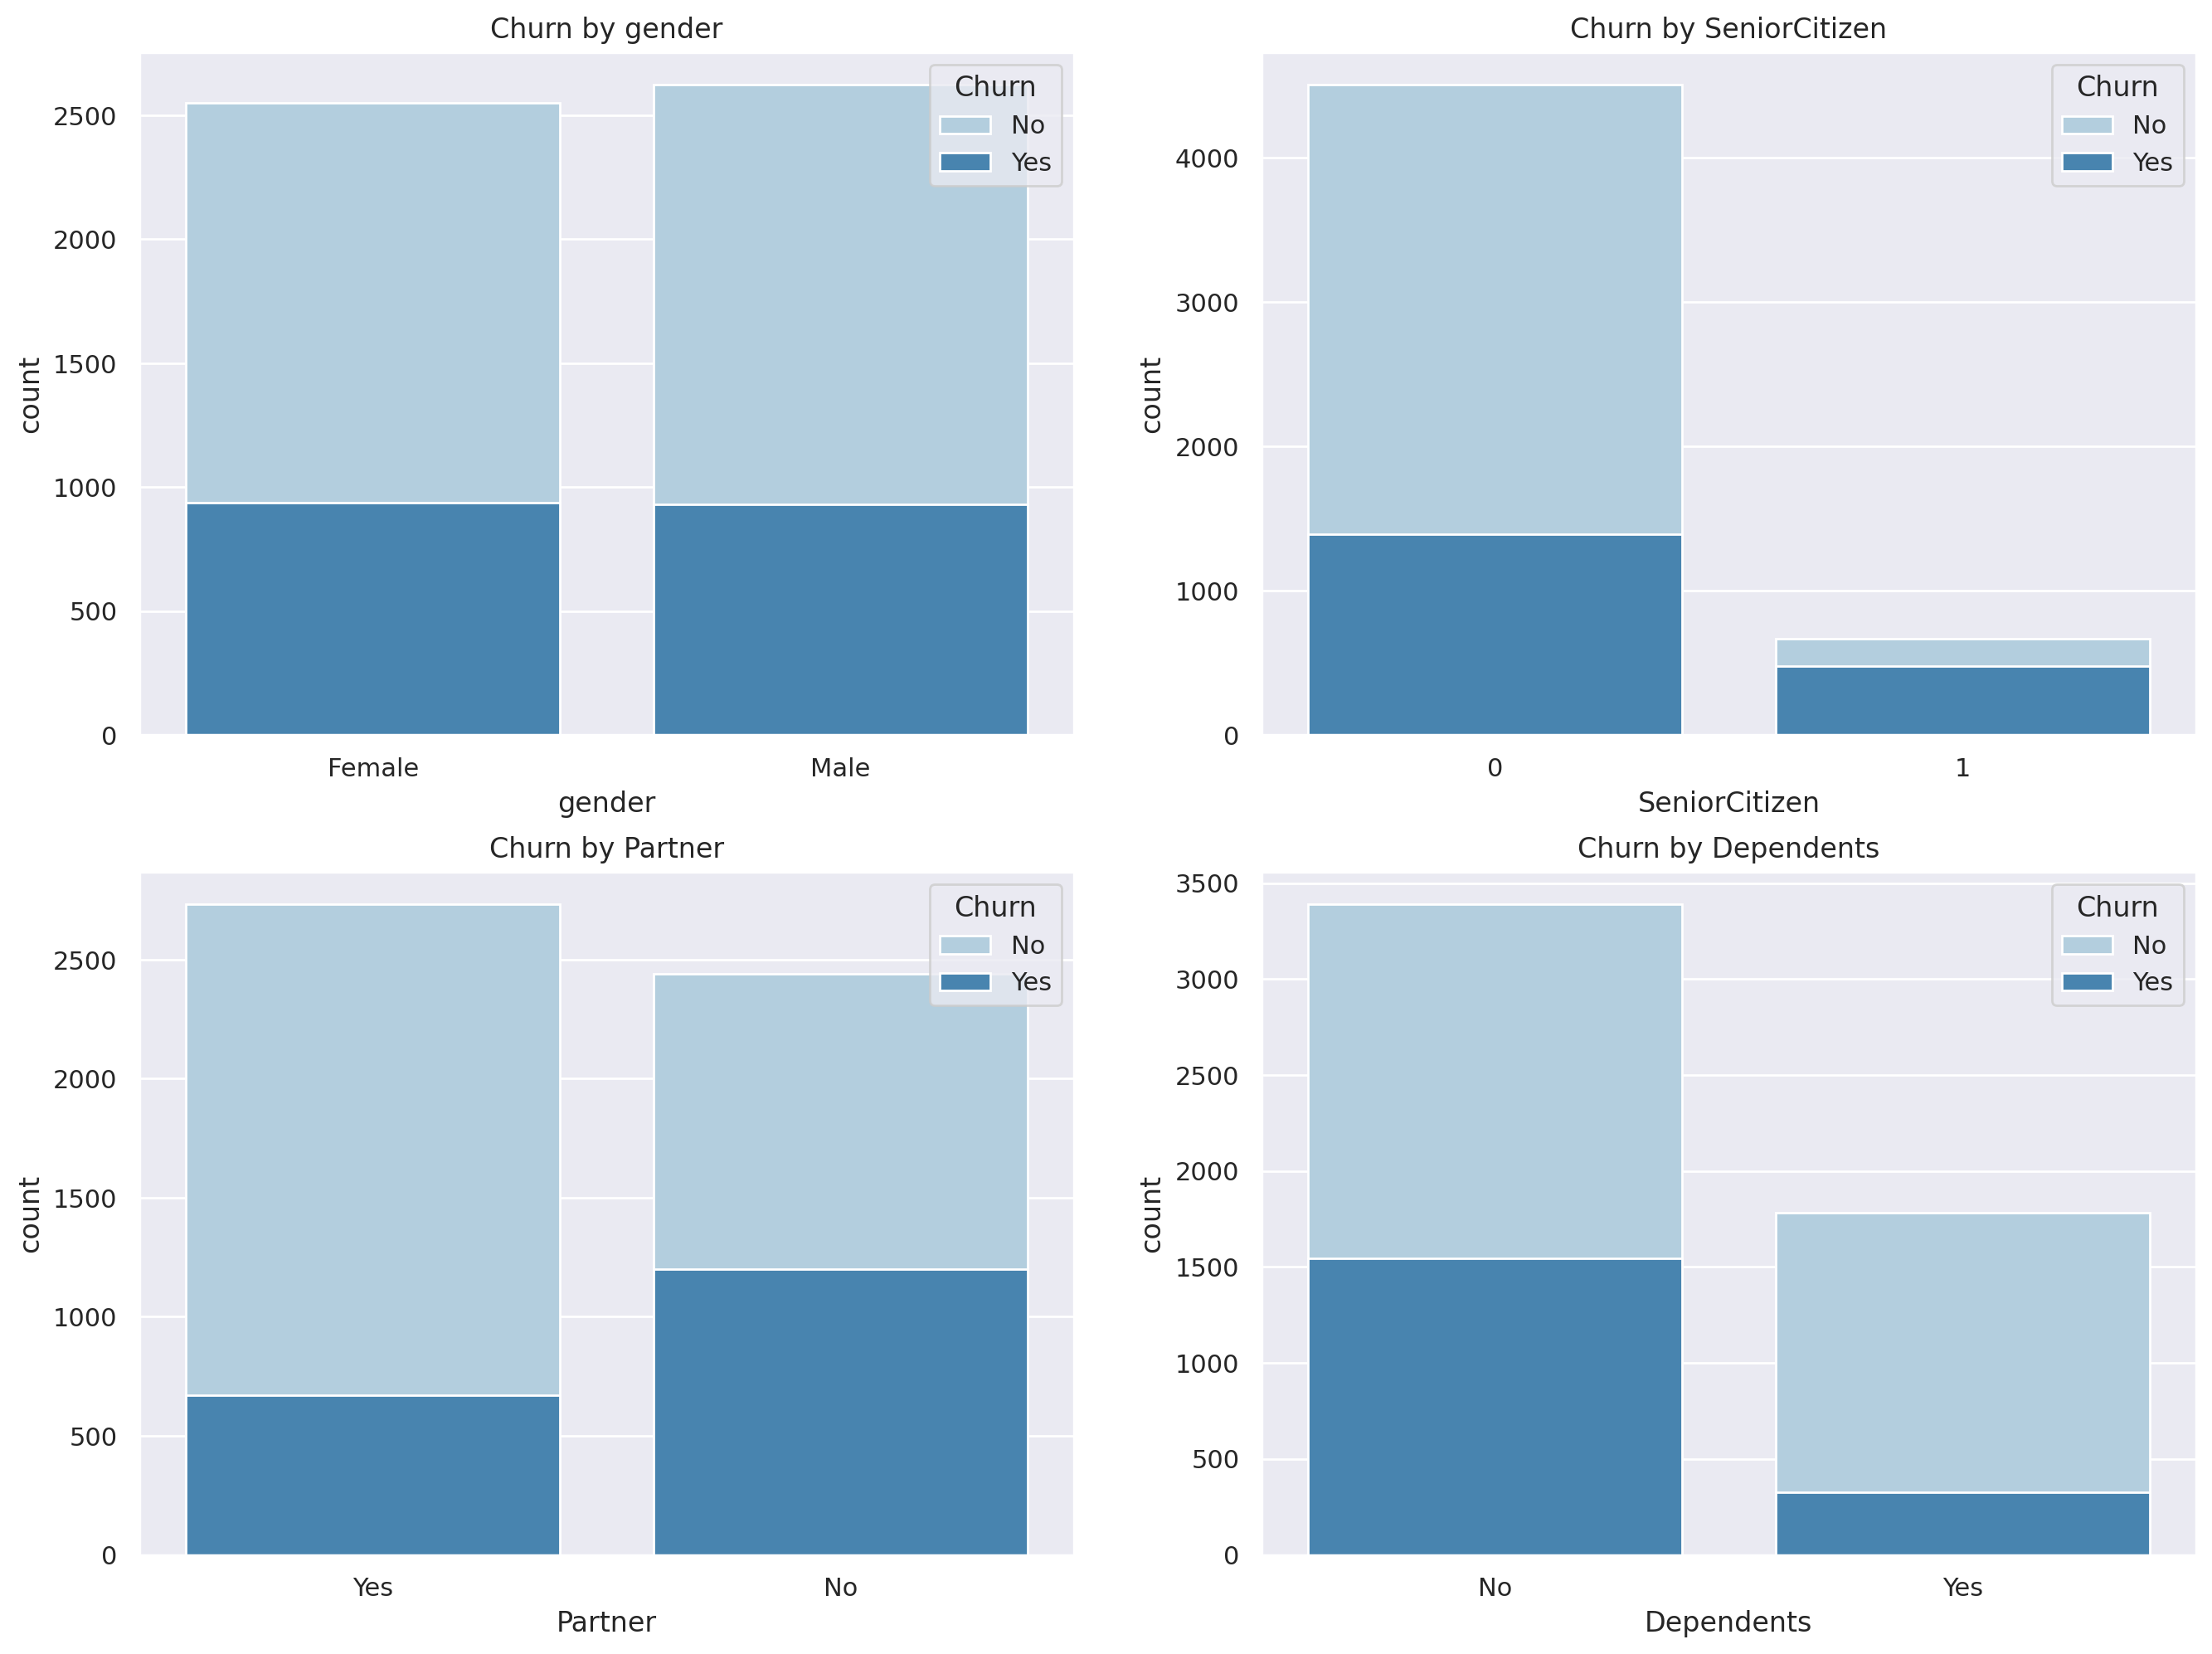

In [59]:
col_1 = ["gender", "SeniorCitizen", "Partner", "Dependents"]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,12), dpi=200)

for i, item in enumerate(col_1):
    plt.subplot(2,2,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=tcc,palette="Blues", dodge=False)
    plt.xlabel(item)
    plt.title("Churn by "+ item)

能够发现，老年用户、未结婚用户以及经济未独立用户流失比例相对较高，而性别因素对是否流失影响不大。在实际制定运营策略时，这三类用户需要重点关注。

- 已注册的服务信息

&emsp;&emsp;然后继续分析服务属性字段与用户流失之间的关系：

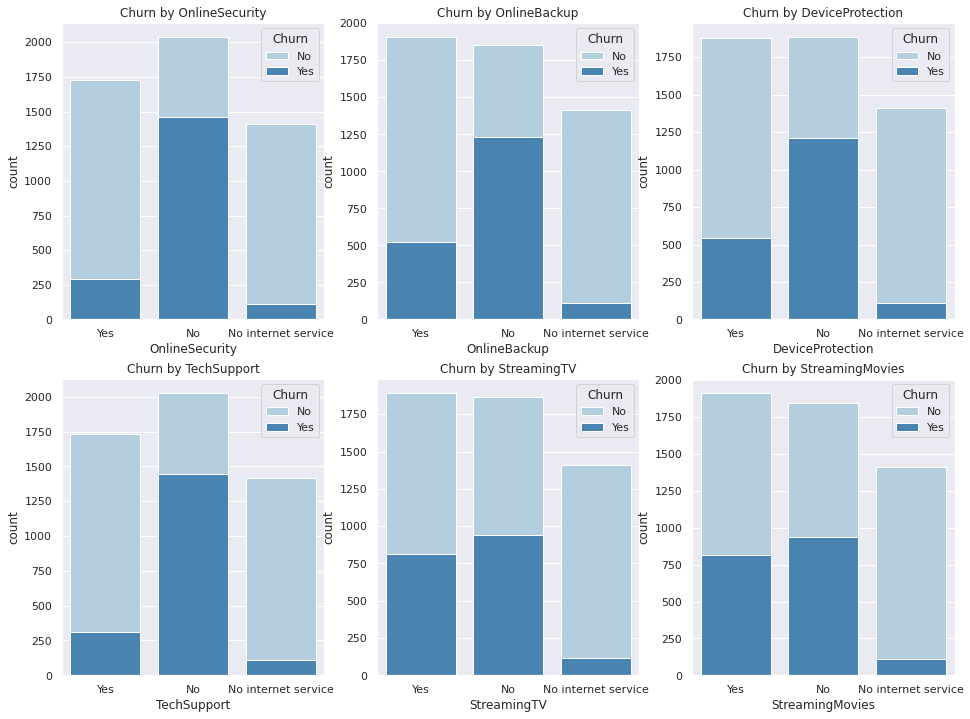

In [60]:
col_2 = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

fig,axes=plt.subplots(nrows=2,ncols=3,figsize=(16,12))

for i, item in enumerate(col_2):
    plt.subplot(2,3,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=tcc,palette="Blues",order=["Yes","No","No internet service"], dodge=False)
    plt.xlabel(item)
    plt.title("Churn by "+ item)

能够发现，未开通网络服务的用户、以及开通了网络服务并且同时开通很多增值服务的用户往往流失概率较小，而开通网络服务、未开通其他增值服务的用户流失概率较大。因此可以考虑更多的提供免费体验增值服务的机会，增加增值服务宣传，促进用户购买，从而提升用户粘性。

- 用户合同属性

&emsp;&emsp;接下来进一步分析用户合同属性与流失率之间的关系：

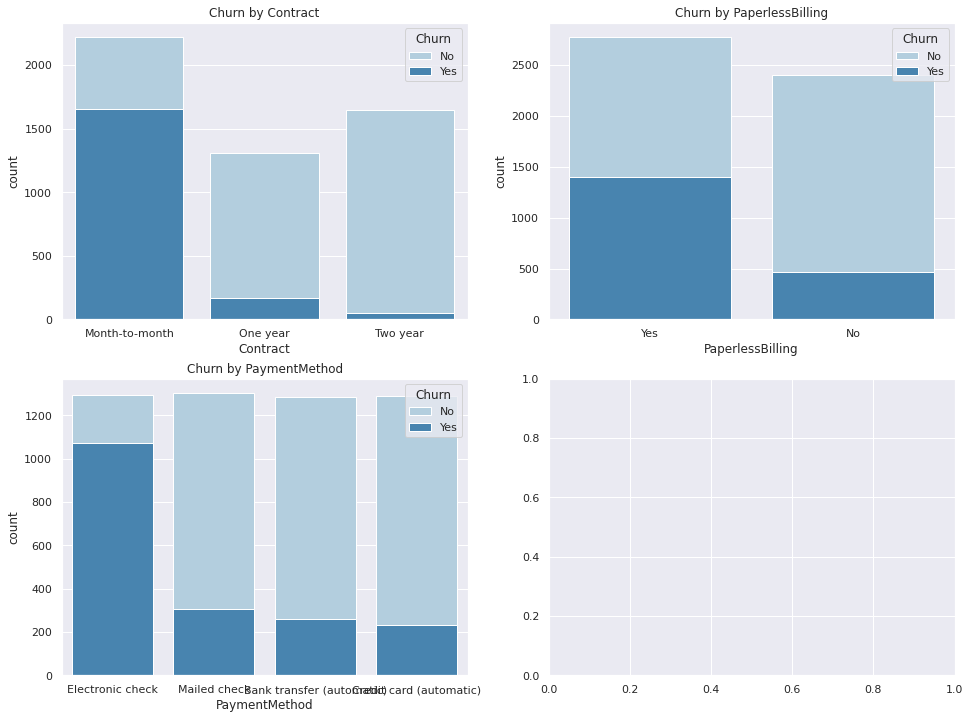

In [61]:
col_3 = ["Contract", "PaperlessBilling", "PaymentMethod"]

fig,axes=plt.subplots(nrows=2,ncols=2,figsize=(16,12))

for i, item in enumerate(col_3):
    plt.subplot(2,2,(i+1))
    ax=sns.countplot(x=item,hue="Churn",data=tcc,palette="Blues", dodge=False)
    plt.xlabel(item)
    plt.title("Churn by "+ item)

能够发现，一次性签署服务周期越短的用户越容易流失，并且相比其他支付方式，在线支付的用户更容易流失。因此可能需要在实际运营过程中更多的引导用户签订长期合同，无论是通过折扣还是满赠，借此提升用户生命周期。此外，需要更加关注在线支付用户的实际产品体验，也可以考虑提升在线支付本身的用户体验或者提供更多的价格优惠，以此提升在线支付用户满意度。

&emsp;&emsp;当然，如果能获取更多的实际业务背景知识，则能够进行更加深入的数据分析与用户挽留策略的制定。不过需要知道的是，无论是作为实际建模预测项目，还是结合实际业务进行数据分析，在完成数据清洗后对变量进行相关性分析，都是了解数据情况的重要手段，也是所有建模过程中必备的环节。在后续的内容中，我们也将在此基础上进一步来进行特征工程以及模型训练的相关工作，最终借助模型，来进行实时的用户流失预测，并且根据最终的模型结果来更精确的判别变量重要性，以及根据模型方程来判断变量影响流失概率的量化结果。